## Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from wordcloud import WordCloud,STOPWORDS

# import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Model Training

#### Train Test Split

In [3]:
# Read Processed Comments:
from scipy.sparse import csr_matrix
def load_sparse_csr(filename):
    # here we need to add .npz extension manually
    loader = np.load(filename + '.npz')
    return csr_matrix((loader['data'], loader['indices'], loader['indptr']),
                      shape=loader['shape'])
X = load_sparse_csr('word_count')
X

<50000x70847 sparse matrix of type '<class 'numpy.int64'>'
	with 4637943 stored elements in Compressed Sparse Row format>

In [4]:
# train_test_split
from sklearn.model_selection import train_test_split
y = pd.read_csv('sentiment', header=None).to_numpy().flatten()

#y must be a dense vector
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state = 1) 

#### Logistic Regression with Bagging

In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(LogisticRegression(max_iter = 10000),n_estimators=30,random_state=1)

In [10]:
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000),
                  n_estimators=30, random_state=1)

In [11]:
# predict labels for the test set
y_predict = clf.predict(X_test)

In [12]:
# Compute accuracy
np.mean(y_test == y_predict)

0.8860666666666667

In [13]:
np.savetxt('y_predict_log30', y_predict, delimiter=',')

In [14]:
clf2 = BaggingClassifier(LogisticRegression(max_iter = 10000),n_estimators=10,random_state=1)
clf2.fit(X_train, y_train)
y_predict2 = clf2.predict(X_test)
print(np.mean(y_test == y_predict2))
np.savetxt('y_predict_log10', y_predict2, delimiter=',')

0.8846666666666667


In [15]:
clf3 = BaggingClassifier(LogisticRegression(max_iter = 10000),n_estimators=20,random_state=1)
clf3.fit(X_train, y_train)
y_predict3 = clf3.predict(X_test)
print(np.mean(y_test == y_predict3))
np.savetxt('y_predict_log20', y_predict3, delimiter=',')

0.8854666666666666


In [19]:
clf4 = BaggingClassifier(LogisticRegression(max_iter = 10000),n_estimators=40,random_state=1)
clf4.fit(X_train, y_train)
y_predict4 = clf4.predict(X_test)
print(np.mean(y_test == y_predict4))
np.savetxt('y_predict_log40', y_predict4, delimiter=',')

0.8859333333333334


In [20]:
clf5 = BaggingClassifier(LogisticRegression(max_iter = 10000),n_estimators=50,random_state=1)
clf5.fit(X_train, y_train)
y_predict5 = clf5.predict(X_test)
print(np.mean(y_test == y_predict5))
np.savetxt('y_predict_log50', y_predict5, delimiter=',')

0.8867333333333334


In [18]:
clf6 = BaggingClassifier(LogisticRegression(max_iter = 10000),n_estimators=60,random_state=1)
clf6.fit(X_train, y_train)
y_predict6 = clf6.predict(X_test)
print(np.mean(y_test == y_predict6))
np.savetxt('y_predict_log60', y_predict6, delimiter=',')

0.8858666666666667


In [38]:
clf7 = BaggingClassifier(LogisticRegression(max_iter = 10000),n_estimators=70,random_state=1)
clf7.fit(X_train, y_train)
y_predict7 = clf7.predict(X_test)
print(np.mean(y_test == y_predict7))
np.savetxt('y_predict_log70', y_predict7, delimiter=',')

0.887


In [47]:
clf8 = BaggingClassifier(LogisticRegression(max_iter = 10000),n_estimators=80,random_state=1)
clf8.fit(X_train, y_train)
y_predict8 = clf8.predict(X_test)
print(np.mean(y_test == y_predict8))
np.savetxt('y_predict_log80', y_predict8, delimiter=',')

0.8868


In [48]:
import matplotlib.pyplot as plt
acc = np.mean(y_test == np.loadtxt('y_predict_logistic'))
acc10 = np.mean(y_test == y_predict2)
acc20 = np.mean(y_test == y_predict3)
acc30 = np.mean(y_test == y_predict)
acc40 = np.mean(y_test == y_predict4)
acc50 = np.mean(y_test == y_predict5)
acc60 = np.mean(y_test == y_predict6)
acc70 = np.mean(y_test == y_predict7)
acc80 = np.mean(y_test == y_predict8)

x = np.arange(0,90,10)
y = np.array([acc,acc10,acc20,acc30,acc40,acc50,acc60,acc70,acc80])

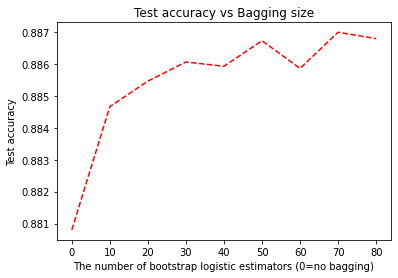

In [52]:
plt.plot(x,y,'r--')
plt.title("Test accuracy vs Bagging size")
plt.xlabel("The number of bootstrap logistic estimators (0=no bagging)")
plt.ylabel("Test accuracy")
plt.savefig("Logistic_bagging")

In [59]:
from mlxtend.plotting import plot_confusion_matrix

y_raw = np.loadtxt('y_predict_logistic')
tn, fp, fn, tp = 0,0,0,0
for i in range(len(y_raw)):
    if y_raw[i] == y_predict8[i] and y_raw[i] == y_test[i]:
        tp += 1
    elif y_raw[i] == y_predict8[i] and y_raw[i] != y_test[i]:
        tn += 1
    elif y_raw[i] != y_predict8[i] and y_raw[i] == y_test[i]:
        fn += 1
    elif y_raw[i] != y_predict8[i] and y_raw[i] != y_test[i]:
        fp += 1   

(1567, 221, 131, 13081)


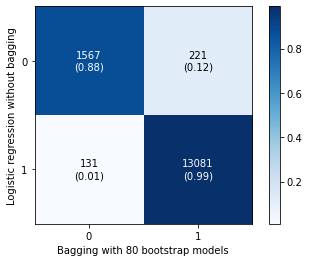

In [62]:
print(str((tn, fp, fn, tp)))

cm = np.array([[tn,fp],
              [fn, tp]])

fig, ax = plot_confusion_matrix(conf_mat = cm,
                                show_absolute=True,
                                show_normed = True,
                                colorbar = True)
plt.xlabel('Bagging with 80 bootstrap models')
plt.ylabel('Logistic regression without bagging')
plt.savefig('McNemar')
plt.show()